<a href="https://colab.research.google.com/github/BattlePlot/Portfolio_Personal/blob/main/SIC_AI_Quizzes/SIC_AI_Chapter_05_Quiz/problem_0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [2]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [91]:
centers = KMeans(n_clusters=3,random_state=123)
centers = centers.fit(X)
clusters = pd.Series(centers.labels_)
centers.cluster_centers_

array([[ 3.90017709, -4.49107153, -5.42803149,  0.79601424,  4.29469615,
        -1.81457648,  9.51919598,  3.41269781],
       [-0.45058073, -1.95855821, -2.81289371,  4.64334117, -1.61152497,
        -8.70234723, -2.26657376,  4.98800128],
       [-6.09715151, -6.62338226,  0.64332419,  0.51743229,  2.50758482,
         6.98957767,  4.47094678,  1.79021736]])

In [98]:
def total_internal_ss(X, centers, clusters):
  SS=0
  for i in range(0,len(centers.cluster_centers_)):
    for j in range(0,X.shape[0]):
      if clusters[j]==i:
        SS+=np.linalg.norm(X[j,]-centers.cluster_centers_[i,])
  
  return SS

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

In [99]:
SS=[]
for i in range(1,11):
  centers=KMeans(n_clusters=i,random_state=123)
  centers = centers.fit(X)
  clusters = pd.Series(centers.labels_)
  sum=total_internal_ss(X,centers,clusters)
  SS.append(sum)

<function matplotlib.pyplot.show>

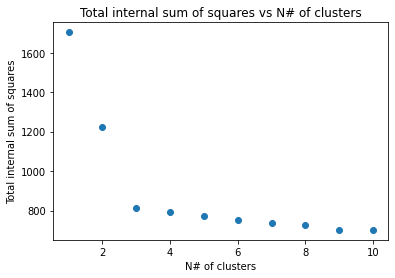

In [103]:
plt.scatter(range(1,11),SS)
plt.title('Total internal sum of squares vs N# of clusters')
plt.xlabel('N# of clusters')
plt.ylabel('Total internal sum of squares')
plt.show